In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format = 'svg' # For mac users with Retina display

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rc, rcParams
import seaborn as sns
import sys

from cosmojo.universe import Cosmo
from cosmojo.mass_func import MassFunction

from scipy.integrate import simps
from scipy.interpolate import interp1d

In [2]:
hmf = MassFunction(Cosmo())

/Users/fbianchini/anaconda/lib/python2.7/site-packages/scipy/integrate/quadpack.py:356: IntegrationWarning: The algorithm does not converge.  Roundoff error is detected
  in the extrapolation table.  It is assumed that the requested tolerance
  cannot be achieved, and that the returned result (if full_output = 1) is 
  the best which can be obtained.
  warnings.warn(msg, IntegrationWarning)


In [3]:
Ms = np.logspace(np.log10(7e13),16,100)
dndm = hmf.dndm(Ms, 0.7)


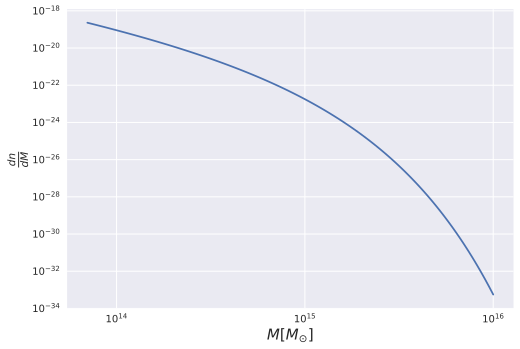

In [5]:
plt.loglog(Ms, dndm)
plt.xlabel(r'$M [M_{\odot}]$', size=15)
plt.ylabel(r'$\frac{dn}{dM}$', size=15)

In [6]:
norm = simps(dndm, Ms)
print 'norm = %e' %norm
dndm = dndm/norm


norm = 8.954050e-06


In [8]:
cdf = np.asarray([simps(dndm[:i+1], Ms[:i+1]) for i in xrange(len(Ms))])

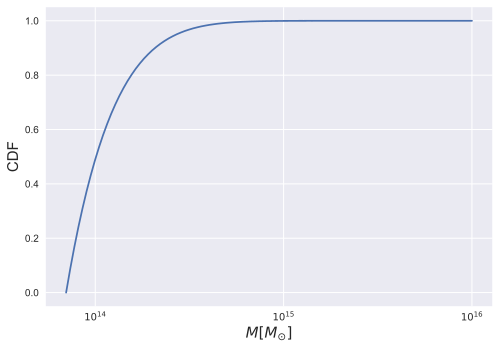

In [12]:
plt.semilogx(Ms, cdf)
plt.xlabel(r'$M [M_{\odot}]$', size=15)
plt.ylabel(r'CDF', size=15)

In [13]:
cdf_inv = interp1d(cdf, Ms)

In [14]:
random_sample = cdf_inv(np.random.rand(1000000))

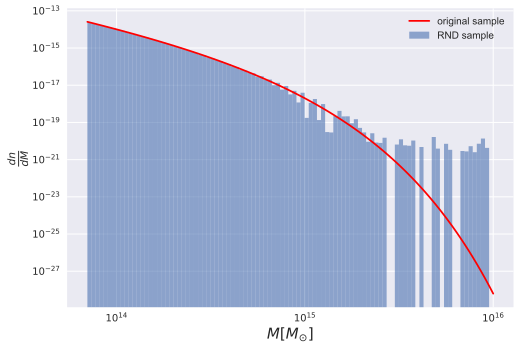

In [23]:
_ = plt.hist(random_sample,normed=1,bins=Ms, alpha=0.6, label='RND sample')
plt.loglog(Ms, dndm, 'r', label='original sample')
plt.legend()
plt.xscale('log')
plt.yscale('log')
plt.xlabel(r'$M [M_{\odot}]$', size=15)
plt.ylabel(r'$\frac{dn}{dM}$', size=15)